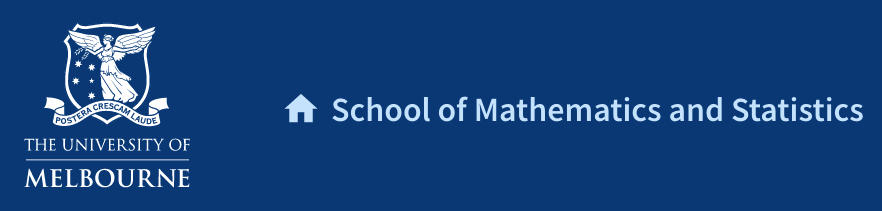

# MAST 90014 - Group Project


## Group members:

Yan Zhang - 893722

Xin Wei - 980496

Qihao Shen - 987777

Yang Chen - 1025408

Mengwei Hua - 1068186

Simin Zuo - 1199404


### Overview ###

- Many businesses  such  as  bakeries,  restaurants,  travel  agencies,  supermarkets,  grocers,  colleges, hotels,  etc.  have  optimisation problems that can be efficiently modelled and solved by the techniques we will see in MAST 90014. Your goal in the group project is to identify and work on such a problem as if you were Operations Research Consultants.

- The size of the problems in small business and the power of the tools we will study often allow for the whole The OR Methodology relies on modelling the situation at hand. to be applied within the short time frame of a teaching semester. 

- As OR/MS consultants,  you  are  expected  to identify and define the scope of the problem  and propose an OR approach, including defining the specification of the problem, proposing a model, collecting and organising the available data, solving the model and analysing the solution.

- Considering the special circumstances due to the COVID-19 pandemic, the problem can be a real problem (identified with a business partner) or a mock problem based on a scientific article or on a realistic situation imagined by the group.
    

### Deliverables
    
- Project proposal: In the project proposal, you should present the problem(s) you have identified in no more than 1,000 words. The proposal should try to establish the basic problem definition, the data that will be needed and the main decision variables. (Delivered as a copy of this notebook).

- Project report: A full report containing the sections described below.

- Project presentations: In a video of no more than 10 minutes, you should present your problem, the approach you used to solve it and discuss the results. The videos will be made available to the whole group.

# Project proposal

## 1. Full problem oriention

Currently Shanghai, as one of the major cities in China is suffering a serious COVID-19 outbreak. The pandemic began on February 28, 2022 and became the most widespread case in China so far. With the rapid spread of the novel coronavirus pneumonia and the wide range of infections, Shanghai as a whole integrity faces enormous pressure for both prevention and control.  

In addition, many neighbourhoods have problems such as high population density, complex personnel distribution and flow, and insufficient number of staffs. Therefore, the daily logistics and distribution tasks are very arduous and require reasonable planning and scheduling.  

Shanghai Authorities have adopted a timely lockdown policy which aims at upholding China's zero-coronavirus policy. Under such measures, residents cannot freely enter or exit the neighbourhoods where they live, so this also exposes many problems, such as difficulties in purchasing groceries and distributing goods for residents.

The ensuing challenges come up with the uneven allocation of human resources, resulting in overstocking goods and upcoming transportation difficulties. Nearly half of our group members are encountering difficulties during this outbreak. Hence, we opt to propose an Optimization Model and Algorithm of Logistics Distribution which aims to minimize the use of human resources to further improve the working efficiency.

## 2. Identify the main decision variables and constraints

### 2.1 Main Decision Variables

#### 2.1.1.  "Big White": China's fight against COVID-19 features a group of doctors and nurses whose identity is hidden behind white hazmat suits.
- $B_{c,w,t}$: number of "Big White" who start collecting Nucleic Acid samples w at time t during a day in community c.

#### 2.1.2. Volunteer: A portion of the residents who are willing to provide free service for the community.
- $V_{c,w,t}$: number of volunteers who start working on work w at time t during a day in community c.

#### 2.1.3. Vehicle Scheduling
- $VE_{c,u,s,j}$: binary variable equal to 1 if vehicle j of category c and utilization u that belongs to station S is selected;
- $x_{i,c,u,s,j}$: binary variable equal to 1 if item i is delivered by vehicle{c,u,s,j};
- $R_{i,j}$: binary variable equal to 1 if vehicle is driven from point i to point j.

### 2.2 Constants

#### 2.2.1. "Big White"
- $BW$: the set of the type of work "Big White" are required to complete;
- $D_{b}^{work}$: The maximum working time for each "Big White";
- $T_{c,bw}$: the set of the time required to complete the work task $bw$, in community $c$;
- $D_{c,bw}$: the set of day of the week required to take once of the work task $bw$, in community $c$;
- $N_{c,bw}$: the minimum number of "Big White"  that required so that the work $bw$ can be done in community $c$.

#### 2.2.2. Volunteer
- $D^{work}$: The maximum working time for each volunteer;
- $C_{w}$: The working efficiency for one volunteer for each job;
- $S_{c,w}$: The total amount of working required for each job for each neighborhood;
- $R_{c}$: The maximum proportion of volunteer.

#### 2.2.3. Vehicle Scheduling
##### 1) Community
- $H_{c}$: total number of households in community $c$;
- $H_{c}^{f}$: the need of food for each household in community $c$ during a week;
- $H_{c}^{g}$: the need of groceries for each household in community $c$ during a week;
- $H_{c}^{a}$: the need of antigen rapid test for each household in community $c$ during a week.

##### 2) Material supply station
- $M_{c}^{t}$: The number of vehicles serving community $c$ in the material supply station;
- $M_{l}$: The geometric coordinate of the material supply station.

##### 3) Epidemic prevention station
- $EP_{c}^{t}$: The number of vehicles serving community $c$ in the epidemic prevention station;
- $EP_{l}$: The geometric coordinate of the epidemic prevention station.

##### 4) Vehicle
- $Cap_{c,t,s,j}$: capacity of vehicle j of type t and utilization u that belongs to station s;
- $I$: Set of item items to be delivered to community c;
- $w_{i}$: weight of item $i$;
- $T = \{Van, Truck\}$: Type of vehicle;
- $U = \{merchandise, "Big White"\}$: Utilization of vehicle.

### 2.3 Constraints
#### 2.3.1. "Big White"
$$
\begin{aligned}
&\sum_{c\in C} \sum_{w \in W} \sum_{t \in T} {B_{c,w,t}} \leq I_{p}, \\
&B_{c,w,t} \ge W_{w,t}^{b},\quad \forall c\in C,\forall w\in W,\forall t \in T.
\end{aligned}
$$


#### 2.3.2. Volunteer
$$
\begin{aligned}
&\sum_{w\in W}{V_{c,w,t}}=0,\quad \forall t\in T^{NonWork}, \\
&\sum_{w\in W} \sum_{t-T_{c,w}}^{t}{V_{c,w,t}} \leq R_{c}H_{c},\quad \forall c\in C,\forall t\in T, \\
&\sum_{t-T_{c,w}}^{t}V_{c,w,t} \ge N_{c,w},\quad \forall c\in C,\forall w\in W,\forall t \in T.
\end{aligned}
$$

#### 2.3.3. Vehicle Scheduling
$$
\begin{aligned}
&\sum_{c \in C} \sum_{u \in U} \sum_{s \in S} VE_{c,u,s,j}=1, \quad \forall j \in J, \\
&\sum_{i \in I} w_{i} \ast x_{i,c,u,s,j} \leq C_{c,u,s,j}, \quad \forall c \in C,\forall u \in U,\forall s \in S,\forall j \in J, \\
&VE_{c,u,s,j} \in \{0,1\}, \quad \forall c \in C,\forall u \in U,\forall s \in S,\forall j \in J, \\
&x_{i,c,u,s,j} \in \{0,1\}, \quad \forall c \in C,\forall u \in U,\forall s \in S,\forall j \in J,\forall i \in I, \\
&\sum_{j\in V \smallsetminus\{i\}} r_{i,j}=1, \quad \forall i \in P, \\
&\sum_{i\in V \smallsetminus\{j\}} r_{i,j}=1, \quad \forall j \in P.
\end{aligned}
$$

## 3. Proposed approach to collect data

Considering the special circumstances due to the COVID-19 pandemic, the background of our chosen problem is under a real setting. Our goal is to improve the model accuracy by using the most realistic data to recreate real events.

Due to information sensitivity, we decide to estimate the scope of datasets by the approach of simulation. In the case of narrowing down the dimensionality, we plan to focus on 20 neighbourhoods in the same subdistrict. The precise geographical coordinates of each neighbourhood and station are known. Also, the total number of households in some certain neighbourhoods is available online, meanwhile, we replace the missing values with the average number.

We assume that all supplies, including food and household commodities, are distributed free of charge by the government at a limited weight. And exclude the group-buying channels organised by residents themselves.

# Project report

## 1. Introduction

Shanghai is one of the megacities in China with a developed economy and a large population. Despite the already high population density, Shanghai still attracts many people to Shanghai every year to seek job opportunities and dreams. According to the census data released by the Shanghai Municipal Bureau of Statistics, the city has a permanent population of about 25 million, including about 9.7 million households. The large population means that the entire city has a huge daily demand for food and other resources. 

This year, a severe COVID-19 outbreak broke out in Shanghai. Shanghai is supposed to be capable and well-resourced to deal with the outbreak since it has first-class educational resources, medical equipment, and technology. However, Shanghai did not stop the spread of the virus as quickly as before, probably because the outbreak was too sudden, and the scope of the impact was too large. The government has taken measures to control the continued spread of the outbreak by limiting the movement of people in each region and regularly collecting nucleic acids tests to detect infected people in time. 

Under such a policy, although most people's lives have not been significantly affected except that they cannot go out often, many problems have also been exposed, such as difficulty in purchasing vegetables and distributing goods for residents. Even some media reported that some vegetables shipped to Shanghai from other cities in China were not received and distributed to residents, and some vegetables were even piled up at the material station without being delivered until they rotted. The materials stored in Shanghai and the resources shipped from other places can definitely meet the demands of all residents in Shanghai. However, the overall strategy and planning of logistics and transportation have not changed according to the current needs of Shanghai, resulting in the inability of materials to be delivered to residents efficiently and technically. In addition, from the perspective of epidemiological theory, reducing the number of people working outside as much as possible is more conducive to controlling the epidemic. 

Therefore, this study hopes to build a model to solve the logistics distribution problem in Shanghai-based on some open data on the Shanghai Internet. First of all, the food, daily necessities, disinfection, and other materials needed by the residents can be dispatched to each neighbourhood in time. Secondly, the “Big Whites”, who were sent to each neighbourhood, completed the task of collecting nucleic acid samples for all residents. Also, volunteers in each neighbourhood distribute all the supplies delivered to the neighbourhood to each household and complete other tasks. The ultimate goal of our research is to find the optimal solution that minimize the total personnel needed on the basis of completing the above three tasks. The long-term meaning of this research is that, in the future, if other cities also encounter similar situations, the model would be used to improve urban logistics efficiency and workers' efficiency.

## 2. Problem definition

Our model aims to address several problems of two identites which are vehicle and volunteer from the perspective of a central planner. 

In this section, we will discusses how our problem is re-defined and what simplifications our problem setting makes that differs from reality. Some modifications from the original proposal will be highlighted as well. In addition, this section will mention which problem variants are covered in our model.

![Mindmap](Mindmap.png)

### 2.1 Vehicle's Objective

The central planer for vehicle is the dispatching centre responsible for the distribution of all kinds of materials needed by the residents, searching for the time planning and allocation of tasks that minimize the number of vehicles used for the delivery of goods and materials, so that the needs of the residents of each neighbourhood are met, as well as ensuring that each truck works for a maximum of 20 hours per day. In this study, we focus only on the limitation of the geographical location between the supply station and the neighbourhood. Whether a specific supply station is responsible for a particular neighbourhood and whether sufficient quantities and types of materials are available within the supply station are out of the scope of our study.

As for simplifications, firstly, assume that the number of available vehicles is sufficient enough and all vehicles are trucks with the same weight limit. Secondly, the actions of the truck include transporting, loading two types of cargo, and unloading two types of cargo, without considering other more actions. The time spent loading and unloading depends on the goods loaded on the truck, work capacity of volunteers and the demands of each neighbourhood. Besides, when the truck is idle, no matter where the vehicle is, rest in that place instead of returning to the supply station to rest. Thirdly, we simplify the vehicle transportation routes which are different from the complex urban roads in real life. By generating multiple vertices to simulate the road between the starting points and the ending points, we try to reproduce the driving route in the real world. Fourthly, we simplify the vehicle speed to a fixed value. Considering that in addition to normal driving, there are many accidents, such as going the wrong way and waiting for traffic lights, so we set the speed to 10 km/hour, which is far less than the speed of vehicles in the city. Finally, each supply station can provide all kinds of necessities, including COVID-19 antigen test kits and food pack. In contrast to our assumptions, in reality, these supplies would be stored separately and in different locations, and residents would need more types of supplies than stated above.

This section combines 3 tasks which are Assignment, Vehicle Scheduling considering the time window and Routing problems. First of all, which one or several supply stations will provide certain material needs of each neighbourhood. Meanwhile, our research problem has variants involving parallel scheduling with multiple jobs. For each supply station, a number of material delivery tasks are assigned to them, and they have several trucks that are available for transportation. The supply stations need to complete all transport tasks in one day. The plan that can accomplish the above goals and minimize the number of vehicles used for transportation is the optimal solution for vehicle's objective section.

### 2.2 Volunteer's Objective

Our study defines volunteers as the portion of residents who are willing to provide free services to the neighbourhoods. And the objective is to find a reasonable allocation of volunteers' working time and distributed tasks. Given that each volunteer can work no more than 8 hours per day and cannot work during the rest period of time, our goal is to reduce the number of volunteers who complete the task of residents' material distribution to achieve the optimal distribution of human resources. Under problem setting, there are two types of work for volunteers, namely, carrying COVID-19 antigen test kits and food pack. 

For simplification of volunteers, we firstly assume that each volunteer has a consistent time window available to the assigned task which is different from the complex scheduling mechanism in real life. Secondly, we simplify the process for volunteers to distribute supplies. When the supplies arrive in each neighbourhood, the volunteers directly collect the supplies according to the type of work they perform and deliver the supplies to each household in batches within the upper limit of the number each person can carry. We do not consider the process of counting, signing, or classifying the materials by the volunteers after the materials are delivered. Additionally, when volunteers were in their break time, we assumed that they should all rest within the neighbourhood, without leaving the neighbourhood. 

The optimization of volunteer resources combines task assignment and scheduling problems. First of all, volunteers from each neighbourhood will be responsible for the neighbourhood's material distribution tasks. At the same time, each volunteer can only start work when the supplies arrive on the same day and they need to complete all assigned tasks within one day. The mechanism that could achieve the above objectives and minimize the number of volunteers assigned per day in each neighbourhood is the optimal solution for the volunteer target interval.

## 3. Data 

Due to the COVID-19 pandemic background and information sensitivity, the data collected in this project are partially simulated. Since the problem we choose in this project is under the real setting, the simulation of the data we did is based on our previous investigation and survey to plenty of communities' real situations in Shanghai, in order to fulfill our goal -- improve the model accuracy by using the most realistic data to reproduce real events. 

In [2]:
# import libraries
import gurobipy as gp
from gurobipy import GRB
import pandas as pd

### 3.1 Neighbourhoods & Supply Stations

In [29]:
# Load data
neighborhoodsTable = pd.read_csv('./datasets/FiveNeighbourhoods.csv')
stationTable = pd.read_csv('./datasets/TwoSupplyStation.csv')

In [30]:
neighborhoodsTable 

,Name,Longitude,Latitude,total_households,total_floor_area (m^2)
0,Jiayuan,121.442295,31.230604,958,"93,750"
1,Sihe Garden (Lane 1940),121.447668,31.233577,498,"80,000"
2,Sanhe Garden,121.446344,31.234742,1583,"220,000"
3,Great Wall Unit,121.444512,31.238014,441,"100,000"
4,Changde Apartment,121.454047,31.231032,24,"5,000"


For the purpose of narrowing down the dimensionality, we regulate that the above five neighbourhoods we chosen are in Jing'an Temple Subdistrict, Jing'an District, which is the most typical region in Shanghai. 

- First column: represents the name of each neighbourhood, translating directly from Chinese to English;
- Second & Third column: 'Longitude' and 'Latitude' attributes are the precise geographical coordinates extracted from the www.anjuke.com by crawling. 
- Fourth column: 'total_households' attribute is the total number of households in each certain neighbourhood which is available online. Since we sharply cut down the number of neighbourhoods compared to our original proposal, we opt to select the neighbourhoods without any missing values.
- The 'total_floor_area(m^2)' attribute is the total planning area of each neighbourhood which is available online as well.

In [31]:
stationTable

,Name,Longitude,Latitude
0,Shanghai Jince Medical Laboratory Co.LTD,121.403496,31.050155
1,Shanghai Nucleus Gene Huaxi Medical Laboratory,121.427847,30.967778


Two supply stations are obtained from one application used in Shanghai where the information of the medical laboratory detecting the NAT can be looked up. These two supply stations serve for all neighbourhoods in Jing'an District according to out background survey.

### 3.2 Vehicle

Few changes have also been updated to the settings of vehicles. We no longer distinguish between the types of vehicles, only one type of vehicle (large truck) is used to transport supplies. And the carrying capacities of vehicle for each type of cargo is also fixed at 4,000kg. The maximum number of vehicles that can be distributed in one supply station is constrained at 10.

### 3.3 Transportation Middle Points

In [32]:
tranMidPointsTable = pd.read_csv('./datasets/tranMidPoints.csv')
tranMidPointsTable

,Unnamed: 0,Name
0,0,Jiayuan-Shanghai Jince Medical Laboratory Co.L...
1,1,Jiayuan-Shanghai Nucleus Gene Huaxi Medical La...
2,2,Jiayuan-Shanghai Nucleus Gene Huaxi Medical La...
3,3,Sihe Garden (Lane 1940)-Shanghai Jince Medical...
4,4,Sihe Garden (Lane 1940)-Shanghai Nucleus Gene ...
5,5,Sihe Garden (Lane 1940)-Shanghai Nucleus Gene ...
6,6,Sanhe Garden-Shanghai Jince Medical Laboratory...
7,7,Sanhe Garden-Shanghai Nucleus Gene Huaxi Medic...
8,8,Sanhe Garden-Shanghai Nucleus Gene Huaxi Medic...
9,9,Great Wall Unit-Shanghai Jince Medical Laborat...


### 3.4 Connections

In [33]:
zTable = pd.read_csv('./datasets/connections.csv', index_col=0)
zTable

,Jiayuan,Sihe Garden (Lane 1940),Sanhe Garden,Great Wall Unit,Changde Apartment,Shanghai Jince Medical Laboratory Co.LTD,Shanghai Nucleus Gene Huaxi Medical Laboratory,Jiayuan-Shanghai Jince Medical Laboratory Co.LTD-0,Jiayuan-Shanghai Nucleus Gene Huaxi Medical Laboratory-0,Jiayuan-Shanghai Nucleus Gene Huaxi Medical Laboratory-1,...,Sihe Garden (Lane 1940)-Shanghai Nucleus Gene Huaxi Medical Laboratory-1,Sanhe Garden-Shanghai Jince Medical Laboratory Co.LTD-0,Sanhe Garden-Shanghai Nucleus Gene Huaxi Medical Laboratory-0,Sanhe Garden-Shanghai Nucleus Gene Huaxi Medical Laboratory-1,Great Wall Unit-Shanghai Jince Medical Laboratory Co.LTD-0,Great Wall Unit-Shanghai Nucleus Gene Huaxi Medical Laboratory-0,Great Wall Unit-Shanghai Nucleus Gene Huaxi Medical Laboratory-1,Changde Apartment-Shanghai Jince Medical Laboratory Co.LTD-0,Changde Apartment-Shanghai Nucleus Gene Huaxi Medical Laboratory-0,Changde Apartment-Shanghai Nucleus Gene Huaxi Medical Laboratory-1
Jiayuan,1,1,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Sihe Garden (Lane 1940),1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sanhe Garden,1,1,1,1,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
Great Wall Unit,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
Changde Apartment,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
Shanghai Jince Medical Laboratory Co.LTD,0,0,0,0,0,1,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
Shanghai Nucleus Gene Huaxi Medical Laboratory,0,0,0,0,0,1,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
Jiayuan-Shanghai Jince Medical Laboratory Co.LTD-0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Jiayuan-Shanghai Nucleus Gene Huaxi Medical Laboratory-0,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Jiayuan-Shanghai Nucleus Gene Huaxi Medical Laboratory-1,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


### 3.5 Constants

In [34]:
# constant definitions
time = list(range(0,24))           # time
timeRest = list(range(0,7))        # time that volunteers are at rest
workingTime = 8                    # maximum daily working time for volunteers

vehicle = list(range(0,10))        # index of vehicles
volunteer = list(range(0,20))      # index of volunteers in each neighborhoods

allNodes = []                      # all set
station= []                        # stations set
neighborhoods = []                 # neighborhoods set
tranMidPoints = []                 # midPoints set
z = {}                             # tables of connections

jobVehicle = list(range(0,5))      # vehicle job types {0: wait, 1: transport, 2: load supply 0, 3: unload supply 0, 4: load supply 1, 5: unload supply 1}
jobVolunteer = [0,1]               # volunteer job types
vehicleCap = 4000                  #vehicleCapacityTable['Weight']['large_Truck']*1000  
volunteerWorkCap = {0:25,1:1000}   # volunteer work abilities for each job
supplies = [0,1]                   # type of supplies need in neighborhoods
needs = {}                         # needs for each type of supplies in each neighborhoods
vLoad = {0:2000,1:10000}           # loading speed


for idx in range(len(stationTable.Name)):
    allNodes.append(stationTable.Name[idx])
    station.append(stationTable.Name[idx])
for idx in range(len(neighborhoodsTable.Name)):
    allNodes.append(neighborhoodsTable.Name[idx])
    neighborhoods.append(neighborhoodsTable.Name[idx])
    needs[neighborhoodsTable.Name[idx],0] = 2000
    needs[neighborhoodsTable.Name[idx],1] = 10000
for idx in range(len(tranMidPointsTable.Name)):
    allNodes.append(tranMidPointsTable.Name[idx])
    tranMidPoints.append(tranMidPointsTable.Name[idx])
for i in allNodes:
    for j in allNodes:
        z[(i,j)] = zTable[i][j]

All the following constants regulations are based on the reality and current situation under the impact of COVID-19.

- time: divide one day into 24 timestamps
- timeRest: regulate that each volunteer rest from 0am to 7am
- workingTime: usually one person works for 8 hours per day

- volunteer: regulate 20 volunteers in each neighbourhood according to the investigation and survey
- jobVolunteer: regulate only 2 kinds of jobs each volunteer need to do -- deliver food pack and deliver COVID-19 antigen test kits 
- volunteerWorkCap: regulate each volunteer can only deliver at most 25kg food pack or 1000 units COVID-19 antigen test kits at a time

- jobVehicle: regulate 5 types of vehicle job -- transport, load and unload for 2 kinds of supplies respectively

- vehicleCap: regulate the capacity of the vehicle as 4000kg

- supplies: regulate only 2 kinds of supplies needed in neighbourhoods -- food pack, COVID-19 antigen test kits 

- needs: regulate the needs for food pack as 2000kg in each neighbourhood, the needs for COVID-19 antigen test kits as 10000 units in each neighbourhood

- vLoad: regulate the loading speed for food pack as 2000kg/h, the loading speed for COVID-19 antigen test kits as 10000 units/h

## 4. Model formulation and solution strategy

### 4.1 Model Formulation
#### Objective Function:

Minimize:
$$
\sum_{v \in vehicle} \theta_{v} + \sum_{n \in neighborhoods} \sum_{i \in volunteer} \omega_{n,i}
$$


#### Variables:

- $\theta_{v}:$ binary variable, equal to $1$ if vehicle $v$ is used in a day,
- $y_{a,b,v,j,t}:$ binary variable, equal to $1$ if vehicle $v$ do $j$ job from node $a$ to node $b$ at time $t$,
- $\xi_{n,s,t}:$ binary variable, equal to $1$ if supply $s$ is delivered and fit for the demand of neighborhoods $n$ at time $t$,
- $x_{a,v,t}:$ binary variable, equal to $1$ if vehicle $v$ is at node $a$ at time $t$,
- $\omega_{n,i}:$ binary variable, equal to $1$ if volunteer $i$ in neighborhood $n$ will work in a day,
- $k_{n,i,w,t}:$ binary variable, equal to $1$ if volunteer $i$ in neighborhood $n$ is working on job $w$ at time $t$,


#### s.t.
$$
\begin{align}
& \sum_{a \in station} \sum_{b \in station|(a = b)} \sum_{v \in vehicle} \sum_{j \in \{0,2,4\}} \sum_{t \in time} y_{a,b,v,j,t} = 0 \label{eq1}\tag{1} \\
& \sum_{a \in allNodes} \sum_{b \in allNodes|(a\neq b)} \sum_{v \in vehicle} \sum_{j \in \{1,2,3,4\}} \sum_{t \in time} y_{a,b,v,j,t} = 0 \label{eq2}\tag{2}\\
& \sum_{a \in neighborhoods} \sum_{b \in neighborhoods|(a = b)} \sum_{v \in vehicle} \sum_{j \in \{0,1,3\}} \sum_{t \in time} y_{a,b,v,j,t} = 0 \label{eq3}\tag{3}\\
& \sum_{a \in allNodes} \sum_{b \in allNodes|(a\neq b)} \sum_{v \in vehicle} \sum_{j \in \{2,3\}} \sum_{t \in time} y_{a,b,v,j,t} = 0 \label{eq4}\tag{4}\\
& \sum_{a \in tranMidPoints} \sum_{b \in tranMidPoints} \sum_{v \in vehicle} \sum_{j \in \{1,2,3,4\}} \sum_{t \in time} y_{a,b,v,j,t} = 0 \label{eq5}\tag{5}\\
& \sum_{a \in allNodes} \sum_{b \in allNodes} \sum_{j \in jobVehicle} \sum_{t \in time} y_{a,b,v,j,t} \leq 20*\theta_{v}, \quad \forall v \in vehicle \label{eq6}\tag{6}\\
& \sum_{a \in allNodes} \sum_{b \in allNodes} \sum_{j \in jobVehicle} y_{a,b,v,j,t} = \theta_{v}, \quad \forall v \in vehicle \quad \forall t \in time \label{eq7}\tag{7}\\
& \sum_{j \in {0}} y_{a,b,v,j,t} \leq Z[(a,b)] \quad \forall a \in allNodes, \quad \forall b \in allNodes, \quad \forall v \in vehicle, \quad \forall t \in time \label{eq8}\tag{8}\\
\end{align}
$$

$$
\begin{align}
& \sum_{s \in station} \sum_{j \in \{1\}} \sum_{\tau \in I} vLoad[0]*y_{s,s,v,j,\tau} - \sum_{n \in neighborhoods} \sum_{j \in \{2\}} \sum_{\tau \in K} needs[(0,0)]*y_{n,n,v,j,\tau} \leq vehicleCap[0], \forall v \in vehicle, \quad \forall t \in time, I = \{0,...,t-1\}, K = \{0,...,t-1\} \label{eq9}\tag{9}\\
& \sum_{s \in station} \sum_{j \in \{3\}} \sum_{\tau \in I} vLoad[0]*y_{s,s,v,j,\tau} - \sum_{n \in neighborhoods} \sum_{j \in \{4\}} \sum_{\tau \in K} needs[(0,0)]*y_{n,n,v,j,\tau} \leq vehicleCap[0], \forall v \in vehicle, \quad \forall t \in time, I = \{0,...,t-1\}, K = \{0,...,t-1\} \label{eq10}\tag{10}\\
& \sum_{s \in station} \sum_{j \in \{1\}} \sum_{\tau \in I} vLoad[0]*y_{s,s,v,j,\tau} - \sum_{n \in neighborhoods} \sum_{j \in \{2\}} \sum_{\tau \in K} needs[(0,0)]*y_{n,n,v,j,\tau} \leq vehicleCap[0], \forall v \in vehicle, \quad \forall t \in time, I = \{0,...,t-1\}, K = \{0,...,t-1\} \label{eq11}\tag{11}\\
& \sum_{s \in station} \sum_{j \in \{3\}} \sum_{\tau \in I} vLoad_{0}*y_{s,s,v,j,\tau} - \sum_{n \in neighborhoods} \sum_{j \in \{4\}} \sum_{\tau \in K} needs[(0,0)]*y_{n,n,v,j,\tau}, \geq 0 \quad \forall v \in vehicle, \quad \forall t \in time,  I = \{0,...,t-1\}, K = \{0,...,t-1\} \label{eq12}\tag{12}\\
\end{align}
$$

$$
\begin{align}
& x_{s,v,-1} = \theta_{v}, \quad \forall v \in vehicle, s = station[0] \label{eq13}\tag{13}\\ 
& \sum_{a \in allNodes} x_{a,v,t} = \theta_{v}, \quad \forall v \in vehicle, \quad \forall t \in \{-1,...,24\} \label{eq14}\tag{14} \\
\end{align}
$$

$$
\begin{align}
& x_{now,v,\tau} = x[now,v,\tau-1] - \sum_{a \in allNodes} \sum_{j \in {0}} y_{now,a,v,j,\tau} + \sum_{b \in allNodes} \sum_{j \in {0}} y_{b,now,v,j,\tau} \quad \forall now \in allNodes, \quad \forall v \in vehicle, \quad \forall \tau \in time \label{eq15}\tag{15} \\
\end{align}
$$

$$
\begin{align}
& \sum_{j \in \{0\}} y_{now,a,v,j,t} \leq x_{now,v,t-1}, \quad \forall now \in allNodes, \quad \forall a \in allNodes, \quad \forall v \in vehicle, \quad \forall t \in time \label{eq16}\tag{16} \\
& y_{now,now,v,j,t} \leq x_{now,v,t-1,} \quad \forall now \in staion, \quad \forall j \in \{1,3\}, \quad \forall v \in vehicle, \quad \forall t \in time \label{eq17}\tag{17} \\
& y_{now,now,v,j,t} \leq x_{now,v,t-1} \quad \forall now \in neighborhoods, \quad \forall j \in \{2,4\}, \quad \forall v \in vehicle, \quad \forall t \in time \label{eq18}\tag{18} \\
& \sum_{a \in allNodes} \sum_{t \in time} \sum_{j \in \{0\}} y_{a,now,v,j,t} = \sum_{b \in allNodes} \sum_{t \in time} \sum_{j \in \{0\}} y_{now,b,v,j,t} \forall now \in neighborhoods, \quad \forall v \in vehicle \label{eq19}\tag{19} \\
\end{align}
$$

$$
\begin{align}
& \sum_{n \in neighborhoods} \sum_{v \in vehicle} y_{n,n,v,j,t} \leq 1, 
\quad \forall j \in {3}, \forall t \in time \label{eq20}\tag{20} \\
& \sum_{s \in \{0\}} \xi_{n,s,t} = \sum_{j \in \{2\}} \sum_{v \in vehicle} y_{n,n,v,j,t}, 
\quad \forall n \in neighborhoods, \forall t \in time \label{eq21}\tag{21} \\
& \sum_{s \in \{1\}} \xi_{n,s,t} = \sum_{j \in \{4\}} \sum_{v \in vehicle} y_{n,n,v,j,t}, 
\quad \forall n \in neighborhoods, \forall t \in time \label{eq22}\tag{22} \\
& \sum_{t \in time} \xi_{n,s,t} = 1, 
\quad \forall n \in neighborhoods, \forall s \in {0,1} \label{eq23}\tag{23} \\
& \sum_{w \in jobVolunteer} k_{n,i,w,t} \leq \omega_{n,i}, 
\quad \forall n \in neighborhoods, \forall i \in volunteer, \forall t \in time \label{eq24}\tag{24} \\
& \sum_{w \in jobVolunteer} \sum_{t \in timeRest} k_{n,i,w,t} = 0, 
\quad \forall n \in neighborhoods, \forall i \in volunteer \label{eq25}\tag{25} \\
& \sum_{w \in jobVolunteer} \sum_{t \in time} k_{n,i,w,t} \leq workingTime * \omega_{n,i}, 
\quad \forall n \in neighborhoods, \forall i \in volunteer \label{eq26}\tag{26} \\
\end{align}
$$

$$
\begin{align}
& \sum_{i \in volunteer} \sum_{t \in time} k_{n,i,w,t} * volunteerWorkCap_{w} \ge needs_{n,w}, 
\quad \forall n \in neighborhoods,  \forall w \in jobVolunteer \label{eq27}\tag{27} \\
& \sum_{j \in \{0,1\}} \sum_{i \in volunteer} k_{n,i,j,t} \leq \sum_{s \in \{0,1\}} \sum_{tau \in I} total volunteer * \xi_{n,s,tau}, 
\quad \forall n \in neighbouhoods, \forall t \in time \label{eq28}\tag{28} \\
\end{align}
$$

Meaning of constraints:

- $(\mathbb{1})$ vehicle can not unload self-transport at station； 
- $(\mathbb{2})$ vehicle can not load/unload when transport from location a to location b；
- $(\mathbb{3})$ vehicle can not self-transport and load in a neighborhood；
- $(\mathbb{4})$ if vehicle is idle it can not change location；
- $(\mathbb{5})$ in transit，vehicle can not load/unload and must move；
- $(\mathbb{6}) \& (\mathbb{7})$ a vehicle only has job when it is planed to be used
- $(\mathbb{8})$ vehicle can only transport if two location are connected
- $(\mathbb{9}) \& (\mathbb{10})$ at any moment, a vehicle can not load more than its capacities
- $(\mathbb{11}) \& (\mathbb{12})$ at any moment, a vehicle can not have negative loads
- $(\mathbb{13})$ all vehicle initially stay at station 0
- $(\mathbb{14})$ all vehicle can only stay at one position for any time
- $(\mathbb{15})$ 
    * 1.if a vehicle is at a place in previous time and not moving away at this moment the vehicle location will not change \
    * 2.if a vehicle is moving away at this moment the vehicle location will update to the next place \
    * 3.if a vehicle is moving toward a place at this moment, the vehicle location will update to this place
- $(\mathbb{16})\& (\mathbb{17}) \&(\mathbb{18})$ a vehicle can have any movement from a location i.i.f. the vehicle is current at this location 
- $(\mathbb{19})$ for every node, total flow in equal to total flow out
- $(\mathbb{20})$ every neighborhood can only unload each supply once a day
- $(\mathbb{21}) \& (\mathbb{22})$ update the bincary variable when a supply is delivered
- $(\mathbb{23})$ all neighborhoods supply needs should be delivered in a day
- $(\mathbb{24})$ a volunteer can only work when the individual is scheduled
- $(\mathbb{25})$ no volunteer should work during rest hours
- $(\mathbb{26})$ no volunteer work more than 8 hours a day
- $(\mathbb{27})$ all volunteer job should be done in a day
- $(\mathbb{28})$ the volunteer can only start work when supply is delivered

### 4.2 Solution Strategy

## 5. Model implementation and solution

### 5.1 Model Implementation

In [49]:
m = gp.Model()

# m.Params.timelimit = 1000

# theta[v]: whether a vehicle v is used in a day
theta = m.addVars(vehicle, vtype=GRB.BINARY, name="theta")
# y[a,b,v,j,t]: a variable that indicates vehicle v do j job from a to b at time t
y = m.addVars(allNodes, allNodes, vehicle, jobVehicle, time, vtype=GRB.BINARY, name="y")
# xi[n,s,t]: whether a supply is delivered and fit for the need
xi = m.addVars(neighborhoods, supplies, time, vtype=GRB.INTEGER, name="xi")
# x[a,v,t]: indicate the current location of vehicle v
x = m.addVars(allNodes, vehicle, range(-1,24), vtype=GRB.BINARY, name="x")
# omega[n,i]: whether a volunteer i in neighborhood n will work in a day
omega = m.addVars(neighborhoods, volunteer, vtype=GRB.BINARY, name="omega")
# k[n,i,w,t]: indicate volunteer i in neighborhood n is working on job w in time t
k = m.addVars(neighborhoods, volunteer, jobVolunteer, time, vtype=GRB.BINARY, name="k")

m.setObjective(gp.quicksum(theta[v] for v in vehicle) + gp.quicksum(omega[n,i] for n in neighborhoods 
                                                                    for i in volunteer), GRB.MINIMIZE)

#  {0: transport, 1: load 0, 2: unload 0, 3: load 1, 4:unload 1, ********}

# vehicle can not unload self-transport at station 
m.addConstr(gp.quicksum(y[a,b,v,j,t]
            for a in station for b in station if a==b for v in vehicle for j in [0,2,4] for t in time) == 0)

# vehicle can not load/unload when tranport from location a to location b
m.addConstr(gp.quicksum(y[a,b,v,j,t]
            for a in allNodes for b in allNodes if a!=b for v in vehicle for j in [1,2,3,4] for t in time) == 0)

# vehicle can not self-transport and load in a neighborhood
m.addConstr(gp.quicksum(y[a,b,v,j,t]
            for a in neighborhoods for b in neighborhoods if a==b for v in vehicle 
                        for j in [0,1,3] for t in time) == 0)


# vehicle can not load/unload and must move
m.addConstr(gp.quicksum(y[a,b,v,j,t] 
            for a in tranMidPoints for b in tranMidPoints for v in vehicle for j in [1,2,3,4] for t in time) == 0)

# a vehicle only has job when it is planed to be used
m.addConstrs(gp.quicksum(y[a,b,v,j,t] for a in allNodes for b in allNodes for j in jobVehicle for t in time) 
             <= 20*theta[v] for v in vehicle)
m.addConstrs(gp.quicksum(y[a,b,v,j,t] for a in allNodes for b in allNodes for j in jobVehicle ) 
             <= theta[v] for v in vehicle for t in time)

# vehicle can only transport if two location are connected
m.addConstrs(y[a,b,v,jobVehicle[0],t] <= z[(a,b)] for a in allNodes for b in allNodes for v in vehicle for t in time)

# at any moment, a vehicle can not load more than it capacities
m.addConstrs(gp.quicksum(vLoad[0]*y[s,s,v,j,tau] for s in station for j in [1] for tau in range(0,t+1))
             - gp.quicksum(needs[n,0]*y[n,n,v,j,tau] for n in neighborhoods for j in [2] for tau in range(0,t+1))
             <= vehicleCap for v in vehicle for t in time)

m.addConstrs(gp.quicksum(vLoad[1]*y[s,s,v,j,tau] for s in station for j in [3] for tau in range(0,t+1))
             - gp.quicksum(needs[n,1]*y[n,n,v,j,tau] for n in neighborhoods for j in [4] for tau in range(0,t+1))
             <= 20000 for v in vehicle for t in time)

# at any moment, a vehicle can not have negative loads
m.addConstrs(gp.quicksum(vLoad[0]*y[s,s,v,j,tau] for s in station for j in [1] for tau in range(0,t+1))
             - gp.quicksum(needs[n,0]*y[n,n,v,j,tau] for n in neighborhoods for j in [2] for tau in range(0,t+1))
             >= 0 for v in vehicle for t in time)

m.addConstrs(gp.quicksum(vLoad[1]*y[s,s,v,j,tau] for s in station for j in [3] for tau in range(0,t+1))
             - gp.quicksum(needs[n,1]*y[n,n,v,j,tau] for n in neighborhoods for j in [4] for tau in range(0,t+1))
             >= 0 for v in vehicle for t in time)

# all vehicle initially stay at station 0
m.addConstrs(x[station[0],v,-1] == theta[v] for v in [0,1,2,3])
m.addConstrs(x[station[1],v,-1] == theta[v] for v in [4,5,6,7,8,9])

# all vehicle can only stay at one postion for any time
m.addConstrs(gp.quicksum(x[a,v,t] for a in allNodes) == theta[v] for v in vehicle for t in range(-1,24))

# 1.if a vehicle is at a place in previous time and not moving away at this moment the vehicle location will not change
# 2.if a vehicle is moving away at this moment the vehicle location will update to the next place
# 3.if a vehicle is moving toward a place at this moment, the vehicle location will update to this place
m.addConstrs(x[now,v,tau] == x[now,v,tau-1] - gp.quicksum(y[now,a,v,jobVehicle[0],tau] for a in allNodes)
            + gp.quicksum(y[b,now,v,jobVehicle[0],tau] for b in allNodes) 
             for now in allNodes for v in vehicle for tau in time)

# a vehicle can have any movement from a location i.i.f. the vehicle is current at this location 
# m.addConstrs(y[now,now,v,jobVehicle[0],t] <= x[now,v,t-1] for now in allNodes for v in vehicle for t in time)
m.addConstrs(y[now,a,v,jobVehicle[0],t] <= x[now,v,t-1] for now in allNodes for a in allNodes 
             for v in vehicle for t in time)
m.addConstrs(y[now,now,v,j,t] <= x[now,v,t-1] for now in station for v in vehicle for j in [1,3] for t in time)
m.addConstrs(y[now,now,v,j,t] <= x[now,v,t-1] for now in neighborhoods for v in vehicle for j in [2,4] for t in time)

# for every node, total flow in equal to total flow out
m.addConstrs(gp.quicksum(y[a,now,v,jobVehicle[0],t] for a in allNodes for t in time) 
            == gp.quicksum(y[now,b,v,jobVehicle[0],t] for b in allNodes for t in time)
            for now in allNodes for v in vehicle)

# every neighborhood can only unload each supply once a day
m.addConstrs(gp.quicksum(y[n,n,v,j,t] for n in neighborhoods for v in vehicle) <= 1 for j in [3] for t in time)

# update the bincary variable when a supply is delivered
m.addConstrs(xi[n,supplies[0],t] == gp.quicksum(y[n,n,v,jobVehicle[2],t] for v in vehicle) 
             for n in neighborhoods for t in time)
m.addConstrs(xi[n,supplies[1],t] == gp.quicksum(y[n,n,v,jobVehicle[4],t] for v in vehicle) 
             for n in neighborhoods for t in time)

# all neighborhoods supply needs should be delivered in a day
m.addConstrs(gp.quicksum(xi[n,s,t]for t in time) == 1 for n in neighborhoods for s in [0,1])

# a volunteer can only work when the individual is scheduled
m.addConstrs(gp.quicksum(k[n,i,w,t] for w in jobVolunteer) <= omega[n,i] for n in neighborhoods 
             for i in volunteer for t in time)

# no volunteer should work during rest hours
m.addConstrs(gp.quicksum(k[n,i,w,t] for w in jobVolunteer for t in timeRest) == 0
            for n in neighborhoods for i in volunteer)

# no volunteer work more than 8 hours a day
m.addConstrs(gp.quicksum(k[n,i,w,t] for w in jobVolunteer for t in time) <= workingTime*omega[n,i]
            for n in neighborhoods for i in volunteer)

# all volunteer job should be done in a day
m.addConstrs(gp.quicksum(k[n,i,w,t]*volunteerWorkCap[w] for i in volunteer for t in time) >= needs[n,w]
            for n in neighborhoods for w in jobVolunteer)

# the volunteer can only start work when supply is delivered
m.addConstrs(gp.quicksum(k[n,i,jobVolunteer[w],t] for i in volunteer)
            <= len(volunteer)*gp.quicksum(xi[n,supplies[w],tau] for tau in range(0,t+1))
             for n in neighborhoods for w in [0,1] for t in time)

m.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 245778 rows, 591450 columns and 2755640 nonzeros
Model fingerprint: 0x0d395baf
Variable types: 0 continuous, 591450 integer (591210 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+04]
Presolve removed 232408 rows and 564177 columns
Presolve time: 2.43s
Presolved: 13370 rows, 27273 columns, 213764 nonzeros
Variable types: 0 continuous, 27273 integer (27273 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

Concurrent spin time: 0.02s

Solved with dual simplex

Root relaxation: objective 5.735526e+01, 5611 iterations, 0.55 seconds (0.63 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent 

In [50]:
# output generation
for v in m.getVars():
    if v.x > 1e-6:
        print(v.varName,v.x)
        
# Display optimal solution value
print('Total cost: ', m.objVal)

theta[1] 1.0
theta[3] 1.0
y[Shanghai Jince Medical Laboratory Co.LTD,Shanghai Jince Medical Laboratory Co.LTD,1,1,1] 1.0
y[Shanghai Jince Medical Laboratory Co.LTD,Shanghai Jince Medical Laboratory Co.LTD,1,1,10] 1.0
y[Shanghai Jince Medical Laboratory Co.LTD,Shanghai Jince Medical Laboratory Co.LTD,1,1,11] 1.0000000000003255
y[Shanghai Jince Medical Laboratory Co.LTD,Shanghai Jince Medical Laboratory Co.LTD,1,3,0] 1.0
y[Shanghai Jince Medical Laboratory Co.LTD,Shanghai Jince Medical Laboratory Co.LTD,1,3,12] 1.0000000000003975
y[Shanghai Jince Medical Laboratory Co.LTD,Shanghai Jince Medical Laboratory Co.LTD,3,1,0] 1.0
y[Shanghai Jince Medical Laboratory Co.LTD,Shanghai Jince Medical Laboratory Co.LTD,3,1,11] 1.0000000000001394
y[Shanghai Jince Medical Laboratory Co.LTD,Shanghai Jince Medical Laboratory Co.LTD,3,3,1] 1.0
y[Shanghai Jince Medical Laboratory Co.LTD,Shanghai Jince Medical Laboratory Co.LTD,3,3,9] 0.9999999999994984
y[Shanghai Jince Medical Laboratory Co.LTD,Shanghai Jin

In [51]:
sol_theta = m.getAttr('x',theta)
sol_y = m.getAttr('x',y)
sol_xi = m.getAttr('x',xi)
sol_x = m.getAttr('x',x)
sol_omega = m.getAttr('x',omega)
sol_k = m.getAttr('x',k)

Table1 = [] #每个小区需要多少志愿者
Table2 = [] #每个防疫站需要多少车
Table3 = [] #每个小区几点获得物资
Table4 = [] #每辆车的工作时长
Table5 = [] #需要动用几号车
Table6 = [] #每个小区的志愿者干了多少时间的活
Table7 = [] #最晚工作时间
Table8 = [] #每个小区的志愿者的最早工作时间
Table9 = [] #每个小区有哪些志愿者干活了
Table10 = [] #每辆车的路线图
#Table1 = [] #每个小区需要多少辆车运输


for n in range(len(neighborhoods)):
    Table1.append([])
    Table3.append([])
    Table6.append([])
    Table7.append([])
    Table8.append([])
    Table9.append([])
    Table1[n].append(sum(sol_omega[neighborhoods[n],i]for i in volunteer))
    for i in volunteer:
        Table8[n].append([])
        Table7[n].append([])
        Table6[n].append([])
        if sum(sol_k[neighborhoods[n],i,w,t]for t in time for w in jobVolunteer) > 1e-6:
            Table6[n][i].append(sum(sol_k[neighborhoods[n],i,w,t]for t in time for w in jobVolunteer))
            Table9[n].append(i)
        for t in time:
            if sum(sol_k[neighborhoods[n],i,w,t] for w in jobVolunteer) >1e-6:
                Table8[n][i].append(t)
                Table7[n][i].append(t)
        if Table8[n][i]:
            Table8[n][i] = min(Table8[n][i])
            Table7[n][i] = max(Table7[n][i])
            Table6[n][i].append(Table8[n][i])
            Table6[n][i].append(Table7[n][i])
    for t in time:
        if sum(sol_y[neighborhoods[n],neighborhoods[n],v,2,t] for v in vehicle) > 1e-6:
            Table3[n].append(t)
        if sum(sol_y[neighborhoods[n],neighborhoods[n],v,4,t] for v in vehicle) > 1e-6:
            Table3[n].append(t)
    Table6[n] = [i for i in Table6[n] if i != []]

for v in vehicle:
    Table10.append([])

for v in vehicle:
    if sum(sol_y[a,b,v,w,t]for a in allNodes for b in allNodes for w in [1,2,3,4] for t in time) > 1e-5:
        Table4.append([sum(sol_y[a,b,v,w,t]for a in allNodes for b in allNodes for w in [1,2,3,4] for t in time)])
        Table5.append(vehicle[v])
    for a in allNodes:
        for b in allNodes:
            for t in time:
                if sol_y[a,b,v,0,t] >1e-5:
                    Table10[v].append(a)
Table10 = [i for i in Table10 if i != []]

for s in range(len(station)):
    Table2.append([])
    Table2[s].append(sum(sol_x[station[s],v,-1]for v in vehicle))


print("Table indicating the number of neighborhood and volunteers:")
Table_v = pd.DataFrame(data = Table1, columns=["Total volunteers of each neighborhood"],index = neighborhoods)
print(Table_v,'\n')
print("Table indicating the number of stations and vehicles:")
Table_car = pd.DataFrame(data = Table2, columns=["Total Cars in each station"],index = station)
print(Table_car,'\n')
print("Table indicating the time for each neighborhood to get supplies:")
Table_time_get_supplies = pd.DataFrame(data = Table3, columns=["Time to get supplies 1", "Time to get supplies 2"],index = neighborhoods)
print(Table_time_get_supplies,'\n')
print("Table indicating the total number of hours per vehicle:")
Table_carwork = pd.DataFrame(data = Table4, columns=["Total working times of each car"] ,index =Table5)
print(Table_carwork,'\n')
print("Table indicating the total working items of each volunteer and their working status:")
for n in range(len(neighborhoods)):
    print(neighborhoods[n])
    Table_vwork = pd.DataFrame(data = Table6[n], index= Table9[n] ,
                               columns = ["Total working times of each volunteer",
                                          "The earliest time to work","The latest time to work"])
    print(Table_vwork,'\n')
print("Table indicating the network about the vehicles:")
Table_network = pd.DataFrame(data = Table10, index = Table5)
print(Table_network,'\n')

Table indicating the number of neighborhood and volunteers:
                         Total volunteers of each neighborhood
Jiayuan                                                   12.0
Sihe Garden (Lane 1940)                                   12.0
Sanhe Garden                                              12.0
Great Wall Unit                                           12.0
Changde Apartment                                         12.0 

Table indicating the number of stations and vehicles:
                                                Total Cars in each station
Shanghai Jince Medical Laboratory Co.LTD                               2.0
Shanghai Nucleus Gene Huaxi Medical Laboratory                         0.0 

Table indicating the time for each neighborhood to get supplies:
                         Time to get supplies 1  Time to get supplies 2
Jiayuan                                      14                      16
Sihe Garden (Lane 1940)                       4                       

### 5.2 Solutions

In [38]:
#!pip install prettytable 
from prettytable import PrettyTable

In [39]:
table1 = PrettyTable()
col_names1 = ["Neibourhood","Total volunteers of each neighborhood"]
table1.add_column(col_names1[0],["Jiayuan","Sihe Garden(Lane 1940) ","Sanhe Garden ","Great Wall Unit ","Changde Apartment "])
table1.add_column(col_names1[1],[12.0,12.0,12.0,12.0,12.0])
print(table1.get_string(title="The number of neighborhoods and volunteers"))

+-----------------------------------------------------------------+
|            The number of neighborhoods and volunteers           |
+-------------------------+---------------------------------------+
|       Neibourhood       | Total volunteers of each neighborhood |
+-------------------------+---------------------------------------+
|         Jiayuan         |                  12.0                 |
| Sihe Garden(Lane 1940)  |                  12.0                 |
|      Sanhe Garden       |                  12.0                 |
|     Great Wall Unit     |                  12.0                 |
|    Changde Apartment    |                  12.0                 |
+-------------------------+---------------------------------------+


In [40]:
table2 = PrettyTable()
col_names2 = ["Medical Station","Total vehicles in each station"]
table2.add_column(col_names2[0],["Shanghai Jince Medical Laboratory Co.LTD","Shanghai Nucleus Gene Huaxi Medical Laboratory"])
table2.add_column(col_names2[1],[2.0,0.0])
print(table2.get_string(title="The number of stations and vehicles"))

+---------------------------------------------------------------------------------+
|                       The number of stations and vehicles                       |
+------------------------------------------------+--------------------------------+
|                Medical Station                 | Total vehicles in each station |
+------------------------------------------------+--------------------------------+
|    Shanghai Jince Medical Laboratory Co.LTD    |              2.0               |
| Shanghai Nucleus Gene Huaxi Medical Laboratory |              0.0               |
+------------------------------------------------+--------------------------------+


In [41]:
table3 = PrettyTable()
col_names3 = ["Neibourhood","Time to get supplies 1", "Time to get supplies 2"]
table3.add_column(col_names3[0],["Jiayuan","Sihe Garden(Lane 1940) ","Sanhe Garden ","Great Wall Unit ","Changde Apartment "])
table3.add_column(col_names3[1],[7,6,9,11,15])
table3.add_column(col_names3[2],[19,21,10,12,16])
print(table3.get_string(title="The time for each neighborhood to get supplies"))

+---------------------------------------------------------------------------+
|               The time for each neighborhood to get supplies              |
+-------------------------+------------------------+------------------------+
|       Neibourhood       | Time to get supplies 1 | Time to get supplies 2 |
+-------------------------+------------------------+------------------------+
|         Jiayuan         |           7            |           19           |
| Sihe Garden(Lane 1940)  |           6            |           21           |
|      Sanhe Garden       |           9            |           10           |
|     Great Wall Unit     |           11           |           12           |
|    Changde Apartment    |           15           |           16           |
+-------------------------+------------------------+------------------------+


In [42]:
table4 = PrettyTable()
col_names4 = ["Vehicle Number","Total working times of each vehicle"]
table4.add_column(col_names4[0],[0,3])
table4.add_column(col_names4[1],[10.0, 10.0])
print(table4.get_string(title="The total number of working hours per vehicle"))

+------------------------------------------------------+
|    The total number of working hours per vehicle     |
+----------------+-------------------------------------+
| Vehicle Number | Total working times of each vehicle |
+----------------+-------------------------------------+
|       0        |                 10.0                |
|       3        |                 10.0                |
+----------------+-------------------------------------+


In [43]:
table5 = PrettyTable()
col_names5 = ["Volunteer Number","Total working times(hours)","The earliest time to work","The latest time to work"]
table5.add_column(col_names5[0],[1,2,3,4,5,6,8,10,11,12,13,18])
table5.add_column(col_names5[1],[8,7,8,8,8,8,7,8,8,8,8,5])
table5.add_column(col_names5[2],[7,7,9,8,9,7,9,8,8,8,7,12])
table5.add_column(col_names5[3],[23,21,23,22,23,23,23,23,23,23,23,23])
print(table5.get_string(title="Total working items of volunteers and their working status in Jiayuan"))

+-----------------------------------------------------------------------------------------------------+
|                Total working items of volunteers and their working status in Jiayuan                |
+------------------+----------------------------+---------------------------+-------------------------+
| Volunteer Number | Total working times(hours) | The earliest time to work | The latest time to work |
+------------------+----------------------------+---------------------------+-------------------------+
|        1         |             8              |             7             |            23           |
|        2         |             7              |             7             |            21           |
|        3         |             8              |             9             |            23           |
|        4         |             8              |             8             |            22           |
|        5         |             8              |             9 

In [44]:
table6 = PrettyTable()
col_names6 = ["Volunteer Number","Total working times(hours)","The earliest time to work","The latest time to work"]
table6.add_column(col_names6[0],[0,1,5,6,7,8,10,12,13,14,18,19])
table6.add_column(col_names6[1],[8,8,7,6,7,8,7,8,7,8,8,8])
table6.add_column(col_names6[2],[12,12,16,14,16,10,13,14,16,12,9,8])
table6.add_column(col_names6[3],[23,23,23,23,23,23,23,23,23,23,23,23])
print(table6.get_string(title="Total working items of volunteers and their working status in Sihe Garden (Lane 1940)"))

+-----------------------------------------------------------------------------------------------------+
|        Total working items of volunteers and their working status in Sihe Garden (Lane 1940)        |
+------------------+----------------------------+---------------------------+-------------------------+
| Volunteer Number | Total working times(hours) | The earliest time to work | The latest time to work |
+------------------+----------------------------+---------------------------+-------------------------+
|        0         |             8              |             12            |            23           |
|        1         |             8              |             12            |            23           |
|        5         |             7              |             16            |            23           |
|        6         |             6              |             14            |            23           |
|        7         |             7              |             16

In [45]:
table7 = PrettyTable()
col_names7 = ["Volunteer Number","Total working times(hours)","The earliest time to work","The latest time to work"]
table7.add_column(col_names7[0],[1,2,4,6,7,8,10,11,13,14,17,19])
table7.add_column(col_names7[1],[8,6,7,8,8,7,8,8,7,7,8,8])
table7.add_column(col_names7[2],[10,18,10,10,10,12,11,9,12,11,14,10])
table7.add_column(col_names7[3],[23,23,23,23,23,22,22,23,23,23,23,21])
print(table7.get_string(title="Total working items of volunteers and their working status in Sanhe Garden"))

+-----------------------------------------------------------------------------------------------------+
|              Total working items of volunteers and their working status in Sanhe Garden             |
+------------------+----------------------------+---------------------------+-------------------------+
| Volunteer Number | Total working times(hours) | The earliest time to work | The latest time to work |
+------------------+----------------------------+---------------------------+-------------------------+
|        1         |             8              |             10            |            23           |
|        2         |             6              |             18            |            23           |
|        4         |             7              |             10            |            23           |
|        6         |             8              |             10            |            23           |
|        7         |             8              |             10

In [46]:
table8 = PrettyTable()
col_names8 = ["Volunteer Number","Total working times(hours)","The earliest time to work","The latest time to work"]
table8.add_column(col_names8[0],[0,1,2,6,10,11,13,14,16,17,18,19])
table8.add_column(col_names8[1],[7,7,7,7,7,7,8,8,8,8,8,8])
table8.add_column(col_names8[2],[12,11,13,14,12,15,16,16,15,13,12,16])
table8.add_column(col_names8[3],[23,23,23,23,23,23,23,23,23,23,20,23])
print(table8.get_string(title="Total working items of volunteers and their working status in Great Wall Unit"))

+-----------------------------------------------------------------------------------------------------+
|            Total working items of volunteers and their working status in Great Wall Unit            |
+------------------+----------------------------+---------------------------+-------------------------+
| Volunteer Number | Total working times(hours) | The earliest time to work | The latest time to work |
+------------------+----------------------------+---------------------------+-------------------------+
|        0         |             7              |             12            |            23           |
|        1         |             7              |             11            |            23           |
|        2         |             7              |             13            |            23           |
|        6         |             7              |             14            |            23           |
|        10        |             7              |             12

In [47]:
table9 = PrettyTable()
col_names9 = ["Volunteer Number","Total working times(hours)","The earliest time to work","The latest time to work"]
table9.add_column(col_names9[0],[0,1,2,5,7,9,10,12,13,17,18,19])
table9.add_column(col_names9[1],[7,7,8,5,8,7,8,8,8,8,8,8])
table9.add_column(col_names9[2],[16,17,15,19,16,16,15,16,16,16,16,16])
table9.add_column(col_names9[3],[22,23,23,23,23,23,23,23,23,23,23,23])
print(table9.get_string(title="Total working items of volunteers and their working status in Changde Apartment"))

+-----------------------------------------------------------------------------------------------------+
|           Total working items of volunteers and their working status in Changde Apartment           |
+------------------+----------------------------+---------------------------+-------------------------+
| Volunteer Number | Total working times(hours) | The earliest time to work | The latest time to work |
+------------------+----------------------------+---------------------------+-------------------------+
|        0         |             7              |             16            |            22           |
|        1         |             7              |             17            |            23           |
|        2         |             8              |             15            |            23           |
|        5         |             5              |             19            |            23           |
|        7         |             8              |             16

In [48]:
table10 = PrettyTable()
col_names10 = ["Vehicles Number","Location","The earliest time to work","The latest time to work"]
table10.add_column(col_names10[0],[])
table10.add_column(col_names10[1],[])
table10.add_column(col_names10[2],[])
table10.add_column(col_names10[3],[])
print(table10.get_string(title="The route map of the vehicles"))

+----------------------------------------------------------------------------------+
|                          The route map of the vehicles                           |
+-----------------+----------+---------------------------+-------------------------+
| Vehicles Number | Location | The earliest time to work | The latest time to work |
+-----------------+----------+---------------------------+-------------------------+
+-----------------+----------+---------------------------+-------------------------+


## 6. Validation and analysis

Validate your solution, present analysis and conclusions to your stakeholders.

## 7. Conclusions

General conclusions about the project and results obtained.